<a href="https://colab.research.google.com/github/MyAscii/JEM207-IES/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


## Remove warnings

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Install Packages

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install matplotlib
#!pip install seaborn

## Import Packages

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

## Import data

In [ ]:
ltrain = pd.read_csv('loan-train.csv')

#Exploring the data

## Exploring train data

In [ ]:
ltrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
ltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
ltrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
ltrain.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
ltrain['Loan_ID'].is_unique

True

In [ ]:
ltrain['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
ltrain['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
ltrain['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
ltrain['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
ltrain['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
ltrain['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
ltrain['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data cleaning

In [ ]:
ltrain.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# changing the NaN value into mean

ltrain['LoanAmount'].fillna(ltrain['LoanAmount'].mean(), inplace=True)
ltrain['Loan_Amount_Term'].fillna(ltrain['Loan_Amount_Term'].mean(), inplace=True)
ltrain['Credit_History'].fillna(ltrain['Credit_History'].mean(), inplace=True)

In [ ]:
# changing the NaN value into mode

ltrain['Gender'].fillna(ltrain['Gender'].mode()[0], inplace=True)
ltrain['Dependents'].fillna(ltrain['Dependents'].mode()[0], inplace=True)
ltrain['Married'].fillna(ltrain['Married'].mode()[0], inplace=True)
ltrain['Credit_History'].fillna(ltrain['Credit_History'].mean(), inplace=True)

# changing the NaN value into No str

ltrain['Self_Employed'].fillna("No", inplace=True)

In [ ]:
ltrain.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data visualization

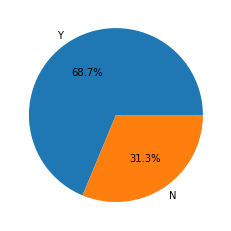

In [ ]:
temp = ltrain['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

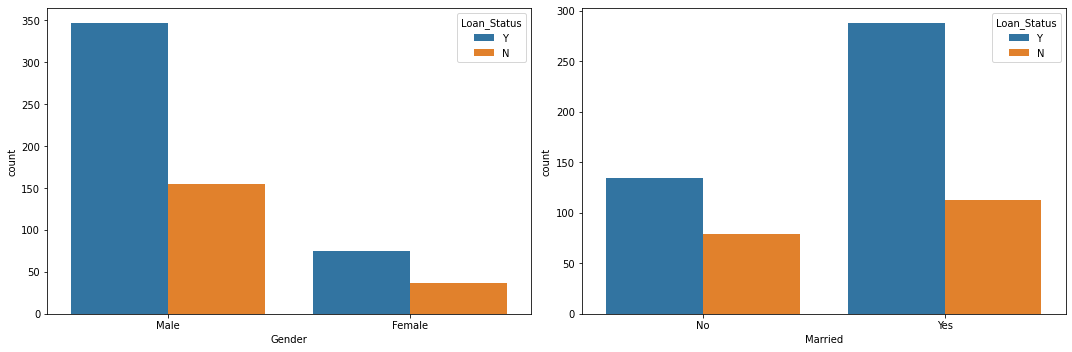

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(ltrain[col], hue=ltrain['Loan_Status'])
plt.tight_layout()
plt.show()

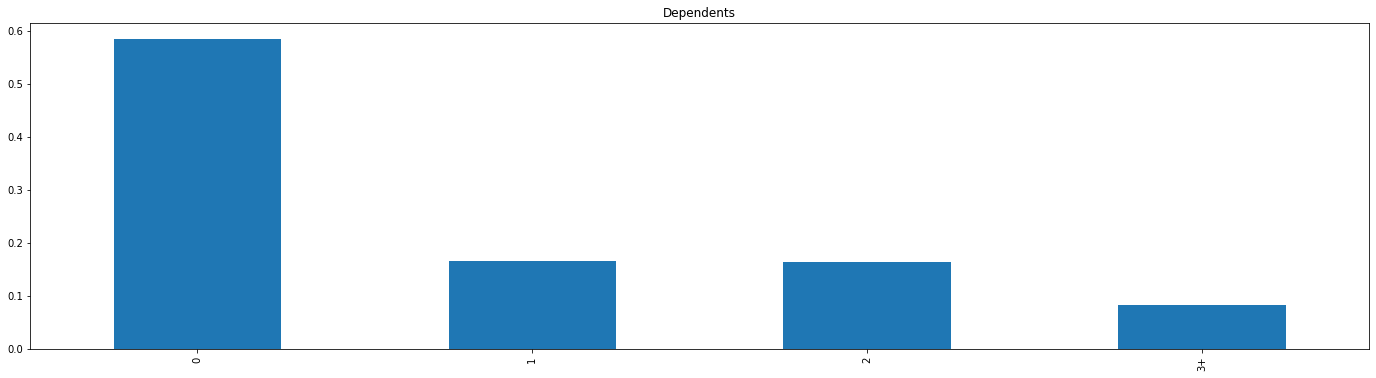

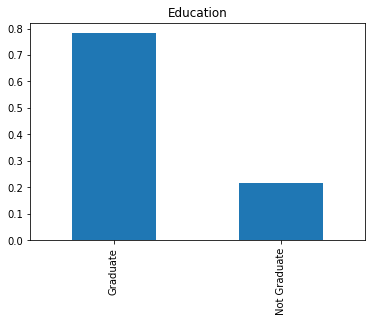

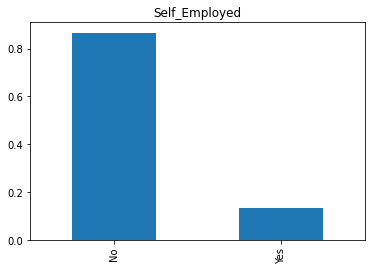

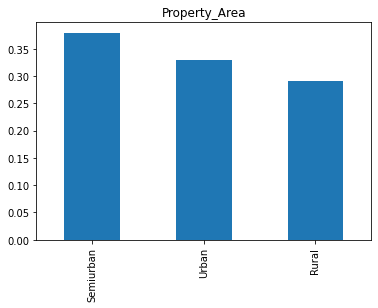

In [ ]:
ltrain['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
ltrain['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
ltrain['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
ltrain['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

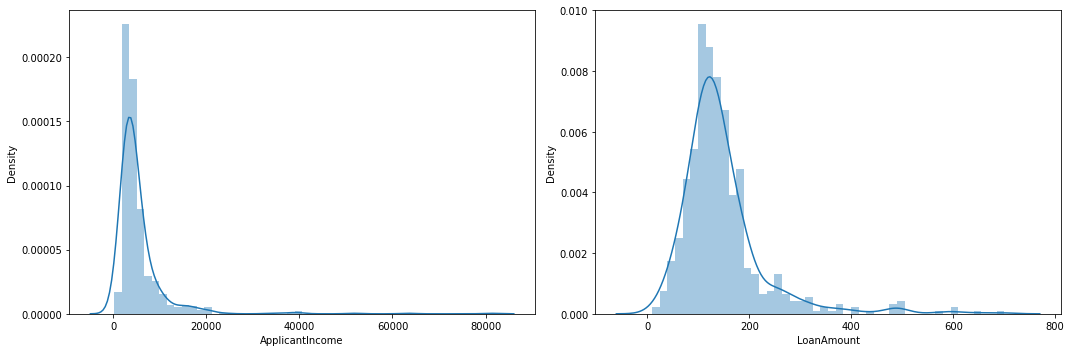

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(ltrain[col])
plt.tight_layout()
plt.show()

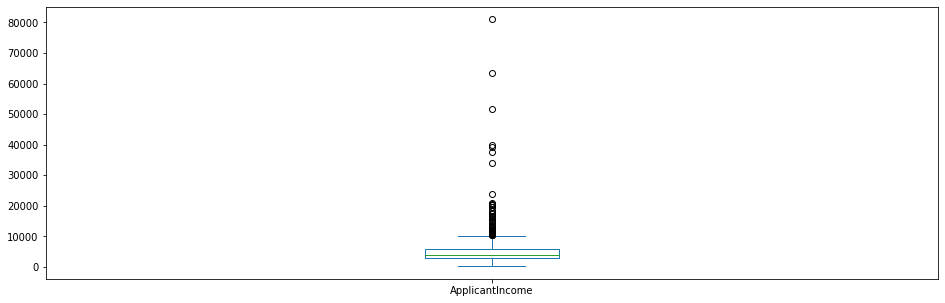

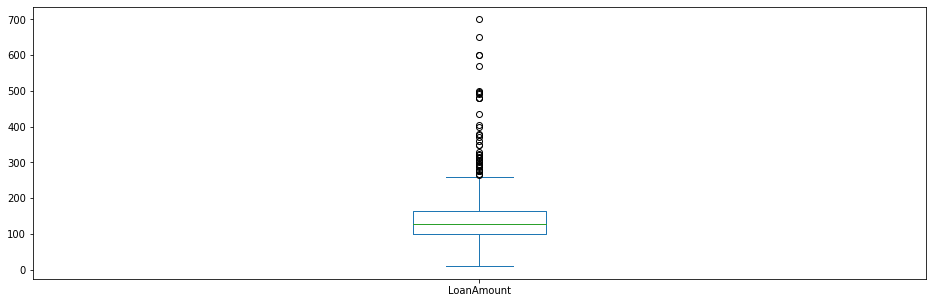

In [ ]:
ltrain['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()
ltrain['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

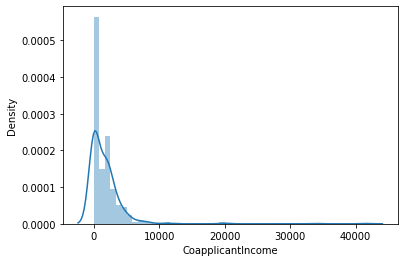

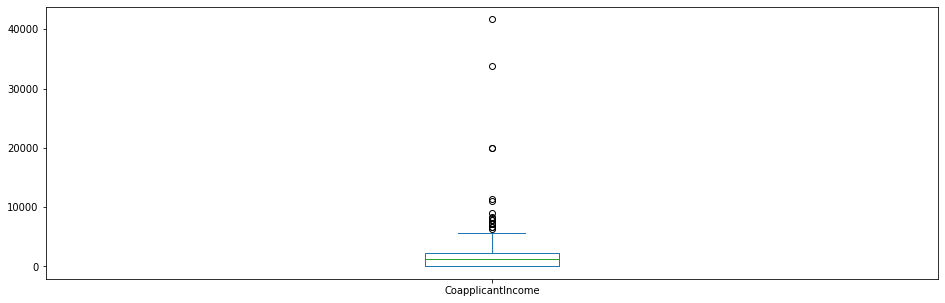

In [ ]:
sb.distplot(ltrain['CoapplicantIncome'])
plt.show()
ltrain['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


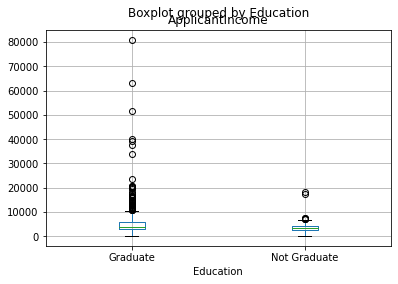

In [ ]:
ltrain.boxplot(column='ApplicantIncome', by = 'Education') 
plt.show()

## Data conversion

In [ ]:
ltrain.Loan_Status = ltrain.Loan_Status.replace({"Y": 1, "N" : 0})

ltrain.Gender = ltrain.Gender.replace({"Male": 1, "Female" : 0})

ltrain.Married = ltrain.Married.replace({"Yes": 1, "No" : 0})

ltrain.Self_Employed = ltrain.Self_Employed.replace({"Yes": 1, "No" : 0})

In [ ]:
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    ltrain[col] = le.fit_transform(ltrain[col])

## Creating Train and Test Dataset

In [ ]:
X = ltrain.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = ltrain['Loan_Status']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
143,1,1,0,0,0,2698,2034.0,122.0,360.0,1.0,1
218,1,1,2,0,0,5000,0.0,72.0,360.0,0.0,1
312,0,0,0,0,0,2507,0.0,56.0,360.0,1.0,0
546,1,0,0,1,0,3358,0.0,80.0,36.0,1.0,1
36,1,1,0,0,0,1828,1330.0,100.0,342.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,2,1,0,4288,3263.0,133.0,180.0,1.0,2
288,0,0,0,0,0,4124,0.0,115.0,360.0,1.0,1
122,0,0,0,0,0,2137,8980.0,137.0,360.0,0.0,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2


# API

In [ ]:
#({"Yes": 1, "No" : 0})
loan = [
{
"Gender": 1,
"Married": 1,
"Dependents": 0,
"Education": 0,
"Self_Employed": 0,
"ApplicantIncome": 5000,
"CoapplicantIncome": 3000,
"LoanAmount": 100,
"Loan_Amount_Term": 360,
"Credit_History": 1,
"Property_Area": 1
}
]
userinput = np.array([list(item.values()) for item in loan])

array([[   1,    1,    0,    0,    0, 5000, 3000,  100,  360,    1,    1]])

# Supervised learning

## Supervised learning - Logistic Regression


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
LR = logistic_model.predict(userinput)
LR_prob = logistic_model.predict_proba(userinput)
LR_score = logistic_model.score(x_train, y_train)
print('Percentage of accuracy of the logistic regression :', round(LR_score*100,2))

Percentage of accuracy of the logistic regression : 81.52


## Supervised learning - Support Vector Classifier


In [ ]:
svm = SVC(probability=True)
svm = svm.fit(x_train, y_train)
SVM = svm.predict(userinput)
SVM_prob = svm.predict_proba(userinput)
SVM_score = svm.score(x_train, y_train)
print('Percentage of accuracy of the support vector classifier :', round(SVM_score*100,2))

Percentage of accuracy of the support vector classifier : 69.38


## Supervised learning - Random forest


In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(x_train, y_train)
RF = rfc.predict(userinput)
RF_prob = rfc.predict_proba(userinput)
RF_score = rfc.score(x_train, y_train)
print('Percentage of accuracy of the random forest :', round(RF_score*100,2))

Percentage of accuracy of the random forest : 100.0


## Supervised learning - Decision tree learning

In [ ]:
dtl = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtl = dtl.fit(x_train, y_train)
DTL = dtl.predict(userinput)
DTL_prob = dtl.predict_proba(userinput)
DTL_score = dtl.score(x_train, y_train)
print('Percentage of accuracy of the decision tree learning :', round(DTL_score*100,2))

Percentage of accuracy of the decision tree learning : 81.7


## Supervised learning - Bootstrap aggregating


In [ ]:
boota = BaggingClassifier()
boota = boota.fit(x_train, y_train)
BOOTA = boota.predict(userinput)
BOOTA_prob = boota.predict_proba(userinput)
BOOTA_score = boota.score(x_train, y_train)
print('Percentage of accuracy of the bootstrap aggregating :', round(BOOTA_score*100,2))

Percentage of accuracy of the bootstrap aggregating : 97.46


## Supervised learning - Naive Bayes classifier


In [ ]:
naive = GaussianNB()
naive = naive.fit(x_train, y_train)
NAIVE = naive.predict(userinput)
NAIVE_prob = naive.predict_proba(userinput)
NAIVE_score = naive.score(x_train, y_train)
print('Percentage of accuracy of the Naive Bayes classifier :', round(NAIVE_score*100,2))

Percentage of accuracy of the Naive Bayes classifier : 80.07


## Supervised learning - Artificial neural network


In [ ]:
mlp = MLPClassifier()
mlp = mlp.fit(x_train, y_train)
MLP = mlp.predict(userinput)
MLP_prob = mlp.predict_proba(userinput)
MLP_score = mlp.score(x_train, y_train)
print('Percentage of accuracy of the artificial neural network :', round(MLP_score*100,2))

Percentage of accuracy of the artificial neural network : 47.46


# API Result

In [ ]:
result = (LR_prob.flat[0]/7)*LR_score+(SVM_prob.flat[0]/7)*SVM_score+(RF_prob.flat[0]/7)*RF_score+(DTL_prob.flat[0]/7)*DTL_score+(BOOTA_prob.flat[0]/7)*BOOTA_score+(NAIVE_prob.flat[0]/7)*NAIVE_score+(MLP_prob.flat[0]/7)*MLP_score 
result = round((1-result)*100,2)
loanresult = [
    {"%_of_getting_accepted": result,
     "logistic_model": LR,
     "logistic_model_prof_of_yes": round(LR_prob.flat[1],4),
     "support_vector_classifier": SVM,
     "support_vector_classifier_prof_of_yes": round(SVM_prob.flat[1],4),
     "random_forest": RF,
     "random_forest_prof_of_yes": round(RF_prob.flat[1],4),
     "decision_tree_learning": DTL,
     "decision_tree_learning_of_yes": round(DTL_prob.flat[1],4),
     "bootstrap_aggregating": BOOTA,
     "bootstrap_aggregating_of_yes": round(BOOTA_prob.flat[1],4),
     "naive_bayes_classifier": NAIVE,
     "naive_bayes_classifier_of_yes": round(NAIVE_prob.flat[1],4),
     "artificial_neural_network": MLP,
     "artificial_neural_network_of_yes": round(MLP_prob.flat[1],4)}
]
for result in loanresult:
    for key, value in result.items():
        if value == [1]:
            result[key] = 'Yes'
        elif value == [0]:
            result[key] = 'No'
print(loanresult)

[{'%_of_getting_accepted': 83.6,
  'logistic_model': 'Yes',
  'logistic_model_prof_of_yes': 0.846,
  'support_vector_classifier': 'Yes',
  'support_vector_classifier_prof_of_yes': 0.6864,
  'random_forest': 'Yes',
  'random_forest_prof_of_yes': 0.83,
  'decision_tree_learning': 'Yes',
  'decision_tree_learning_of_yes': 0.8279,
  'bootstrap_aggregating': 'Yes',
  'bootstrap_aggregating_of_yes': 'Yes',
  'naive_bayes_classifier': 'Yes',
  'naive_bayes_classifier_of_yes': 0.9619,
  'artificial_neural_network': 'No',
  'artificial_neural_network_of_yes': 0.0231}]